In [1]:
import numpy as np
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.signal as ss

# Сходимость
Проверим, с какой скоростью сходятся разные методы

In [2]:
# М-К (для монотонных функций)
def mc(f, x, n):
    x0, x1 = x
    y0, y1 = 0, max(f(x0), f(x1))
    xs = np.random.rand(n) * (x1 - x0) + x0
    ys = np.random.rand(n) * (y1 - y0) + y0
    inside = f(xs) > ys
    m = sum(inside)
    s = (m / n) * (y1 - y0) * (x1 - x0)
    return s

# метод прямоугольников (левых)
def quad_r1(f, x, n):
    h = (x[1] - x[0]) / n
    xs = np.linspace(x[0], x[1], n+1)[:-1]
    fs = f(xs)
    return np.sum(fs * h)

# метод прямоугольников (средних)
def quad_r2(f, x, n):
    h = (x[1] - x[0]) / n
    xs = np.linspace(x[0], x[1], n+1)[:-1] + h/2
    fs = f(xs)
    return np.sum(fs * h)

# метод трапеций
def quad_t(f, x, n):
    h = (x[1] - x[0]) / n
    xs = np.linspace(x[0], x[1], n+1)
    fs = f(xs)
    return np.sum(fs[1:-1] * h) + (fs[0] + fs[-1]) / 2 * h

# метод Симпсона
def quad_s(f, x, n):
    h = (x[1] - x[0]) / n
    xs = np.linspace(x[0], x[1], n+1)
    xs_m = xs[:-1] + h/2
    fs = f(xs)
    fs_m = f(xs_m)
    return (np.sum(fs[:-1]) + 4*np.sum(fs_m) + np.sum(fs[1:])) * h /6

Прогоняем все методы и смотрим на соотношение точности и кол-ва вычислений

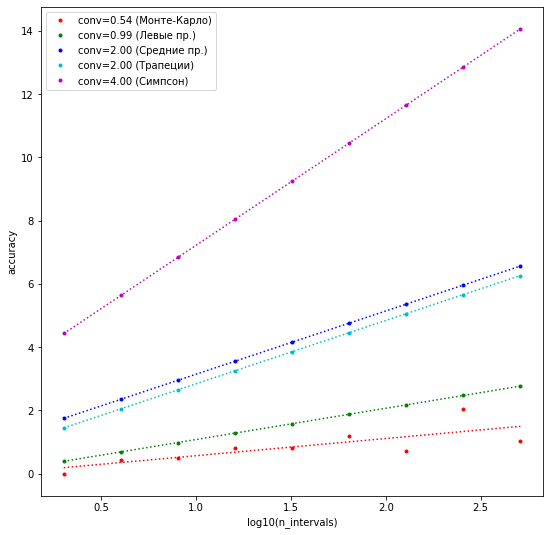

In [3]:
f = lambda x : np.exp(x)
x = [0, 1]
y0 = np.exp(1) - 1

ns = 2 ** np.arange(1, 10)
xs = np.log10(ns)

colors = 'rgbcmyk'
plt.figure(figsize=(9, 9))
for i, (meth, name) in enumerate(zip([mc, quad_r1, quad_r2, quad_t, quad_s],
                                     ['Монте-Карло', 'Левые пр.', 'Средние пр.', 'Трапеции', 'Симпсон'])):
    ys = -np.log10(np.abs([y0 - meth(f, x, n) for n in ns]))
    k = np.polyfit(xs, ys, 1)
    
    # погрешность
    plt.plot(xs, ys, f'{colors[i]}.', label=f'conv={k[0]:.2f} ({name})')

    # линейная аппроксимация
    # угол наклона - это оценка скорости сходимости
    plt.plot(xs, ys - ss.detrend(ys), f'{colors[i]}:')
    
plt.legend()
plt.xlabel('log10(n_intervals)')
plt.ylabel('accuracy')
pass